In [2]:
"""
Instructions:
Use the dataset below. Work with the data, perform the analysis, and generate a visual. 
The dataset for this month is: Drug harm and Dependence (mirrors).

Our goal is to analyze the data and present a visual that illustrates the relationship between drug harm
and dependence. Harm is measured; physically (acute, chronic, IV) and socially (intoxication, 
healthcare costs). Dependence is measured psychologically, physically or as a function of pleasure.

We will examine the relationship between harm and dependence. We will attempt to find patterns between drugs.

Let's start by checking out the head of the dataset.
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

col_names=['Drug','sumMeanPhysandDep','MeanPhysicalHarm','MedianPhysicalHarm','MeanNAzero','AcuteHarm',
           'ChronicHarm','IVHarm','MeanDependence','Pleasure','Psychological','Physical',
           'MeanSocialHarm','Intoxication','SocialHarm','HealthCareCosts']
df = pd.read_excel('/Users/michaelwest/Documents/drugharmdependence/data.xlsx',names=col_names,
              )
print(df.head(4))

           Drug  sumMeanPhysandDep  MeanPhysicalHarm  MedianPhysicalHarm  \
0        Heroin               5.78              2.78                 2.8   
1       Cocaine               4.72              2.33                 2.0   
2  Barbiturates               4.24              2.23                 2.3   
3       Tobacco               4.11              1.90                 1.9   

   MeanNAzero  AcuteHarm  ChronicHarm  IVHarm  MeanDependence  Pleasure  \
0        2.78        2.8          2.5     3.0            3.00       3.0   
1        2.33        2.0          2.0     3.0            2.39       3.0   
2        2.23        2.3          1.9     2.5            2.01       2.0   
3        1.24        0.9          2.9     NaN            2.21       2.3   

   Psychological  Physical  MeanSocialHarm  Intoxication  SocialHarm  \
0            3.0       3.0            2.54           1.6         3.0   
1            2.8       1.3            2.17           1.8         2.5   
2            2.2       1.8 

From the following scatter plot below we see that there seems to be a linear relationship betweendependence and physical harm. 

We also see from the increasing size of the bubble that social harm shares this linear relationship between the two. We also notice that alcohol and tobacco (legal substances) register quite high on this scale especially when compared to LSD and Ecstasy which are schedule 1 drugs.
 
We expect to see heroin and cocaine register high and this is reflected across all three measures.
This slice of our data ignores NA values found in the IV-Harm feature.

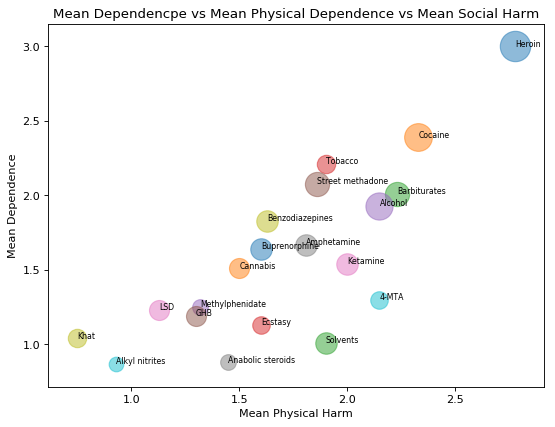

In [3]:
types = ['Heroin','Cocaine','Barbiturates','Tobacco','Alcohol','Street methadone','Ketamine','Amphetamine',
'Benzodiazepines','4-MTA','Buprenorphine','Cannabis','Solvents','Ecstasy','Methylphenidate','GHB','LSD',
'Anabolic steroids','Khat','Alkyl nitrites']

x_c = df.MeanPhysicalHarm
y_c = df.MeanDependence

plt.figure(figsize=(8, 6), dpi=80)

plt.xlabel('Mean Physical Harm')
plt.ylabel('Mean Dependence')
plt.title('Mean Dependencpe vs Mean Physical Dependence vs Mean Social Harm')


for i, type in enumerate(types):
    x = x_c[i]
    y = y_c[i]
    plt.scatter(x, y, s=df.SocialHarm[i] * 250, alpha=.5)
    plt.text(x, y, type, fontsize=7)

plt.show()

When we treat the NA values found in IV-Harm as 0 instead of ignoring them we find that the desparity between Heroine and the other drugs grows. Noteably, we see alcohol and tobacco drop closer to ecstasy and LSD. We see cannabis drops into the lower echelon of physical harm. Over all we have a much more accurate view of the three way relationship. That is to say meth, cocaine, amphetamines, and heroine are in the upper echelon of the group. Alochol and tobacco are in the middle and LSD, cannabis and ecstasy are in the lower echelon.

GHB registers as a possibly anomaly. The drug is known as the 'date rape' drug which suggests it may score fairly high in social harm and acute physical harm, however this is not represented in the data.

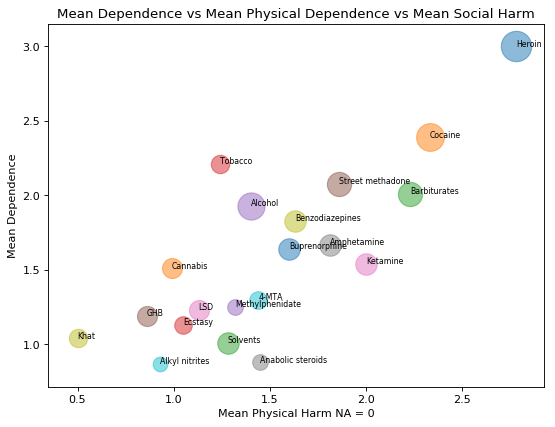

In [4]:
x_c = df.MeanNAzero
y_c = df.MeanDependence

plt.figure(figsize=(8,6), dpi=80)

plt.xlabel('Mean Physical Harm NA = 0')
plt.ylabel('Mean Dependence')
plt.title('Mean Dependence vs Mean Physical Dependence vs Mean Social Harm')


for i, type in enumerate(types):
    x = x_c[i]
    y = y_c[i]
    plt.scatter(x, y, s=df.SocialHarm[i] * 250, alpha=.5)
    plt.text(x, y, type, fontsize=7)

plt.show()


Below we'll make use of barplot to examine the relationship between physical harm and dependence.We see drugs that register high in phsyial harm also register high in pleasure. MTA-4, however; hregister very high in physical harm but has almost no footprint in pleasure.

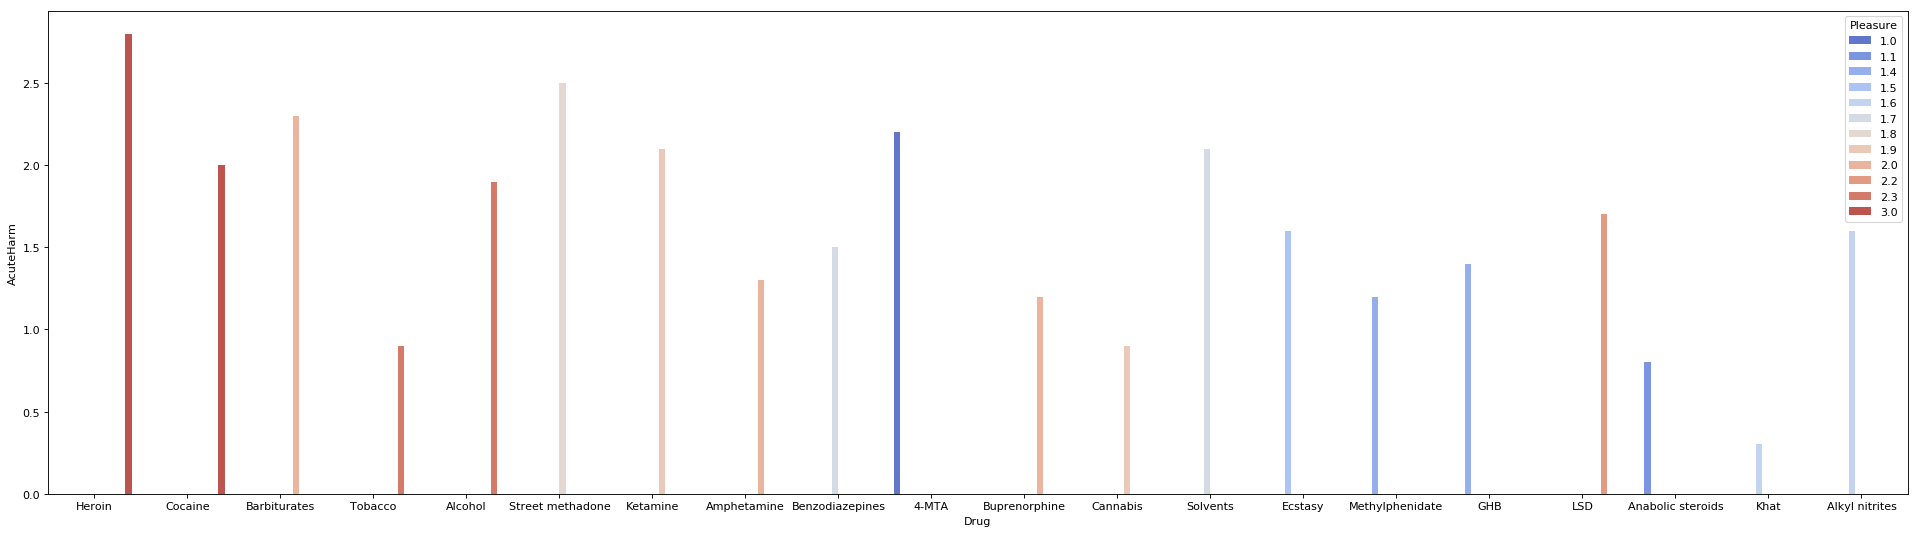

In [5]:
plt.figure(figsize=(30, 8), dpi=80)
sns.barplot(df.Drug, df.AcuteHarm, hue=df.Pleasure, palette='coolwarm')


In [6]:
df1=df.drop(columns=['MeanDependence','Pleasure','Psychological','Physical',
           'MeanSocialHarm','Intoxication','SocialHarm','HealthCareCosts'],axis=0)

